# Lead Scoring Case Study


## Problem Statement
 - An education company named X Education sells online courses to industry professionals
 - Now, although X Education gets a lot of leads, its lead conversion rate is very poor. 
 - For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.  
 - The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
 - The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Step 1 - Reading the dataset and understanding it

In [516]:
## Importing all the required liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Warning suppressings

import warnings
warnings.filterwarnings('ignore')


In [517]:
## Reading the dataset(csv) file into a dataframe 

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [518]:
## Get shape of the dataframe

lead_df.shape

(9240, 37)

In [519]:
## Info of the dataframe

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 


- The dataset has 37 columns and 9240 rows
- Data type of the columns looks ok 
- There are many columns having missing values at higher rate

In [520]:
## Getting highlevel statistics of the dataframe

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- Significant Outliers are there 

# Step 2 - Data cleansing 

In [521]:
## Verify if dataset has any duplicates

lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- There is no duplicate record

In [522]:
## Seeing that 'Prospect ID' and 'Lead Number' columns stores some surrogate keys which is not useful, lets drop them

lead_df = lead_df.drop(['Prospect ID','Lead Number'],axis = 1)
lead_df.shape

(9240, 35)

In [523]:
## Few columns have default value 'select', let us replace with NaN

lead_df = lead_df.replace('Select',np.NaN)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [524]:
## Find null/missing values and treating them

round((lead_df.isnull().sum()/len(lead_df))*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [525]:
## Let us list the columns having more that 35% of null values

columns_gt_35_null = lead_df.columns[(lead_df.isnull().sum()/len(lead_df))*100 > 35]
print(columns_gt_35_null)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [526]:
## Let take backup of the origional data frame

lead_df_origional = lead_df
lead_df_origional.shape

(9240, 35)

In [527]:
## Let us drop the columns having > 35% missing values

lead_df = lead_df.drop(columns_gt_35_null,axis=1)

In [528]:
lead_df.shape

(9240, 25)

### The below 10 columns having more than 35 % of missing values are dropped

 - 'Specialization'
 - 'How did you hear about X Education'
 - 'Tags'
 - 'Lead Quality'
 - 'Lead Profile'
 - 'City'
 - 'Asymmetrique Activity Index'
 - 'Asymmetrique Profile Index'
 - 'Asymmetrique Activity Score'
 - 'Asymmetrique Profile Score'

In [529]:
## Rechecking for missing values 
missing_cols = lead_df.columns[(lead_df.isnull().sum()/len(lead_df))*100 > 0]
print(missing_cols)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


### Below columns still have missing values, let us impute them

- 'Country'
- 'What is your current occupation',
- 'Lead Source'
- 'TotalVisits'
- 'Page Views Per Visit'
- 'Last Activity',
- 'What matters most to you in choosing a course'


# Step 3 - EDA

In [530]:
## Analysing the columns missing values

lead_df[missing_cols].info()
       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   What is your current occupation                6550 non-null   object 
 6   What matters most to you in choosing a course  6531 non-null   object 
dtypes: float64(2), object(5)
memory usage: 505.4+ KB


Text(0.5, 1.0, 'Lead Source')

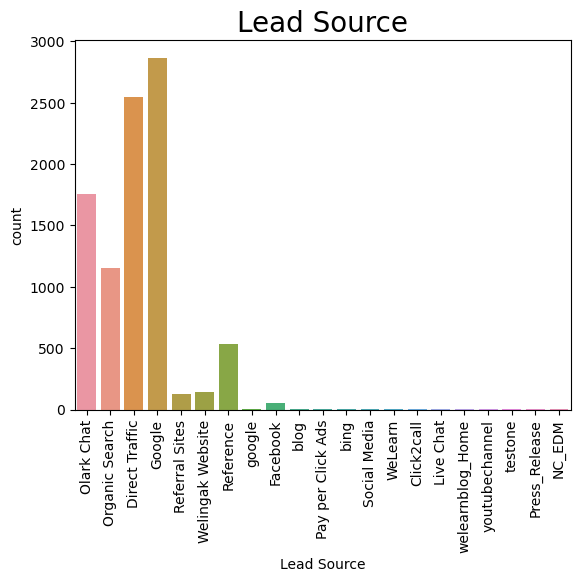

In [531]:
## Analysing "Lead Source" column

sns.countplot(x='Lead Source',data=lead_df)
plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)


In [532]:
## There is 'Google' and 'google', making the consistent

lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')


In [533]:
## Filling missing values with mode value
lead_df['Lead Source'] = lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0])

Text(0.5, 1.0, 'Lead Source')

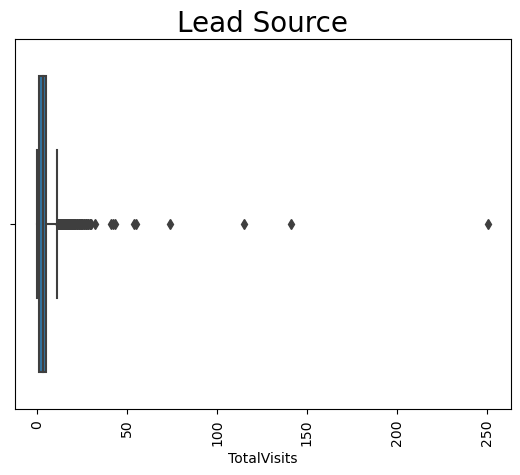

In [534]:
## Analysing "TotalVisits" column

sns.boxplot(x='TotalVisits',data=lead_df)
plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)


In [535]:
lead_df['TotalVisits'].describe([.25,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99,1])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         5.000000
90%         7.000000
95%        10.000000
96%        10.000000
97%        11.000000
98%        13.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [536]:
## Based on the boxplot and percentile value there is outlier, lets elimate the records after 99th percentile

Percentile_99 = lead_df['TotalVisits'].quantile([0.99]).values
lead_df = lead_df[lead_df['TotalVisits']<=Percentile_99[0]]

In [537]:
lead_df.shape

(9020, 25)

In [538]:
lead_df['TotalVisits'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9020 entries, 0 to 9239
Series name: TotalVisits
Non-Null Count  Dtype  
--------------  -----  
9020 non-null   float64
dtypes: float64(1)
memory usage: 140.9 KB


Text(0.5, 1.0, 'Page Views Per Visit')

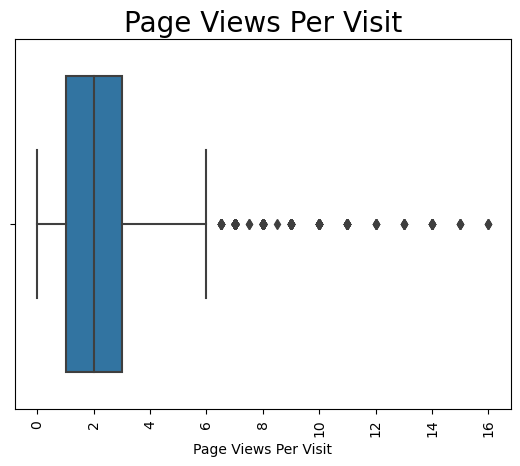

In [539]:
## Analysing 'Page Views Per Visit'

sns.boxplot(x='Page Views Per Visit',data=lead_df)
plt.xticks(rotation = 90)
plt.title('Page Views Per Visit',fontsize=20)


In [540]:

lead_df['Page Views Per Visit'].describe([0,.25,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99,1])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
0%          0.000000
25%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         2.500000
70%         3.000000
80%         4.000000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
100%       16.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [541]:
## Based on the boxplot and percentile value there is outlier, lets elimate the records after 99th percentile

Percentile_99 = lead_df['Page Views Per Visit'].quantile([0.99]).values
lead_df = lead_df[lead_df['Page Views Per Visit']<=Percentile_99[0]]

In [542]:
lead_df.shape

(8953, 25)

In [543]:
lead_df['Page Views Per Visit'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8953 entries, 0 to 9239
Series name: Page Views Per Visit
Non-Null Count  Dtype  
--------------  -----  
8953 non-null   float64
dtypes: float64(1)
memory usage: 139.9 KB


Text(0.5, 1.0, 'Last Activity')

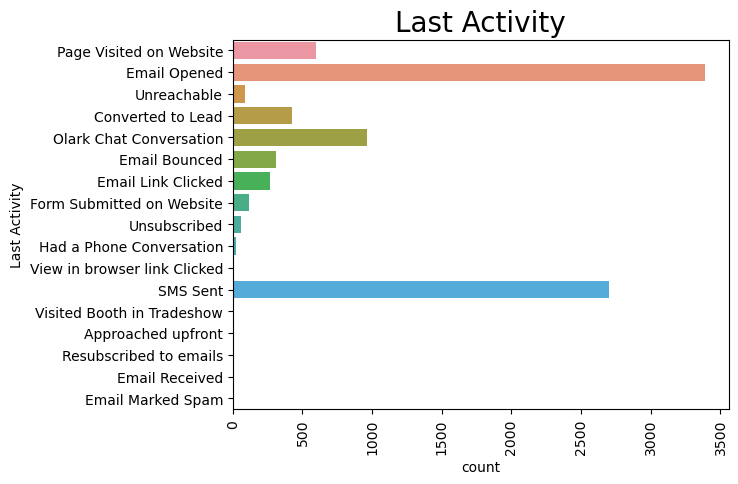

In [544]:
## Analysing the column 'Last Activity'

sns.countplot(y='Last Activity',data=lead_df)
plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

In [545]:
lead_df['Last Activity'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8953 entries, 0 to 9239
Series name: Last Activity
Non-Null Count  Dtype 
--------------  ----- 
8953 non-null   object
dtypes: object(1)
memory usage: 139.9+ KB


# Observation
- Now there is no missing value in 'Last Activity' column

Text(0.5, 1.0, 'Country')

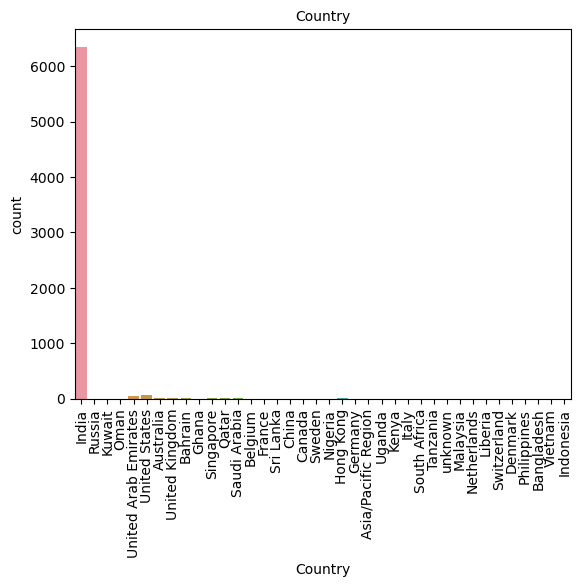

In [546]:
## Analysing the column 'Country'

sns.countplot(x='Country',data=lead_df)
plt.xticks(rotation = 90)
plt.title('Country',fontsize=10)

In [547]:
## Let us impute the missing values with mode value

lead_df['Country'].fillna(lead_df['Country'].mode()[0],inplace=True)

Text(0.5, 1.0, 'What is your current occupation')

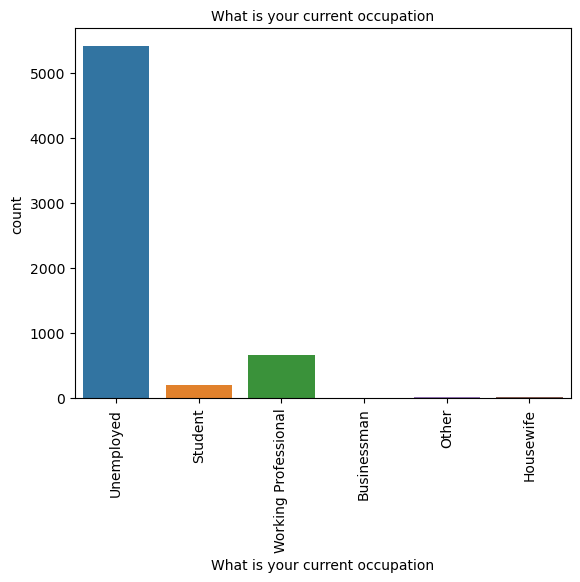

In [548]:
## Analysing the column 'What is your current occupation'

sns.countplot(x='What is your current occupation',data=lead_df)
plt.xticks(rotation = 90)
plt.title('What is your current occupation',fontsize=10)

In [549]:
## Imputing the missing value with 'Other'

lead_df['What is your current occupation'].fillna('Other',inplace=True)

In [550]:
lead_df['What is your current occupation'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8953 entries, 0 to 9239
Series name: What is your current occupation
Non-Null Count  Dtype 
--------------  ----- 
8953 non-null   object
dtypes: object(1)
memory usage: 139.9+ KB


Text(0.5, 1.0, 'What matters most to you in choosing a course')

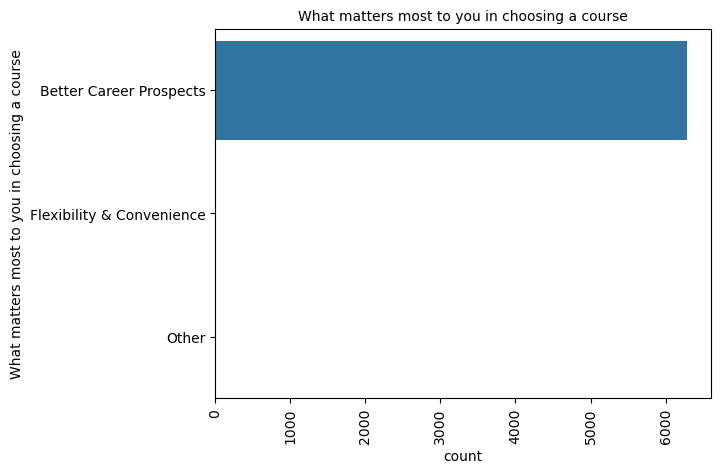

In [551]:
## Analysing the column 'What matters most to you in choosing a course'

sns.countplot(y='What matters most to you in choosing a course',data=lead_df)
plt.xticks(rotation = 90)
plt.title('What matters most to you in choosing a course',fontsize=10)

In [552]:
lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [553]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8951
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [554]:
## Rechecking the columns for missing value

round((lead_df.isnull().sum()/len(lead_df))*100,2).sort_values(ascending=False)

Lead Origin                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Source                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                          

## Observations
- No missing values

In [555]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [556]:
# Taking backup of the Dataframe

lead_df_bkp = lead_df

# Dropping the columns which are not relevant

lead_df.drop(columns = ['Do Not Call',
'Country',
'What matters most to you in choosing a course',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview',
'Last Notable Activity'
],inplace = True)

# Step 3 - EDA

In [557]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8953 non-null   object 
 1   Lead Source                      8953 non-null   object 
 2   Do Not Email                     8953 non-null   object 
 3   Converted                        8953 non-null   int64  
 4   TotalVisits                      8953 non-null   float64
 5   Total Time Spent on Website      8953 non-null   int64  
 6   Page Views Per Visit             8953 non-null   float64
 7   Last Activity                    8953 non-null   object 
 8   What is your current occupation  8953 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 699.5+ KB


# Univariate Analysis

<Axes: xlabel='Converted', ylabel='count'>

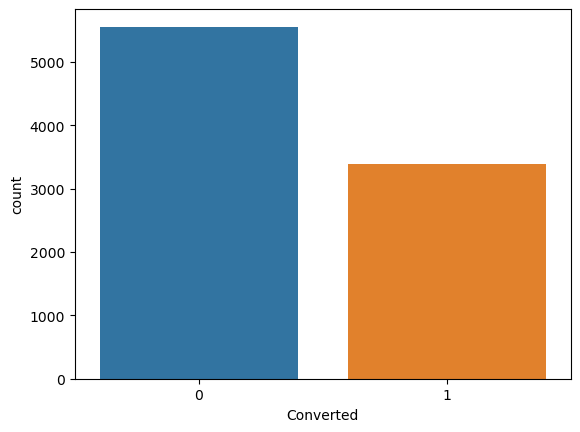

In [558]:
# Analysing our Target variable 'Converted'

sns.countplot(x='Converted',data=lead_df)

In [559]:
# Convertion ratio

round(sum(lead_df['Converted'])/len(lead_df['Converted'].index)*100,2)

37.92

# Observations

- 0 : Not converted to lead
- 1 : Successfully converted to lead  

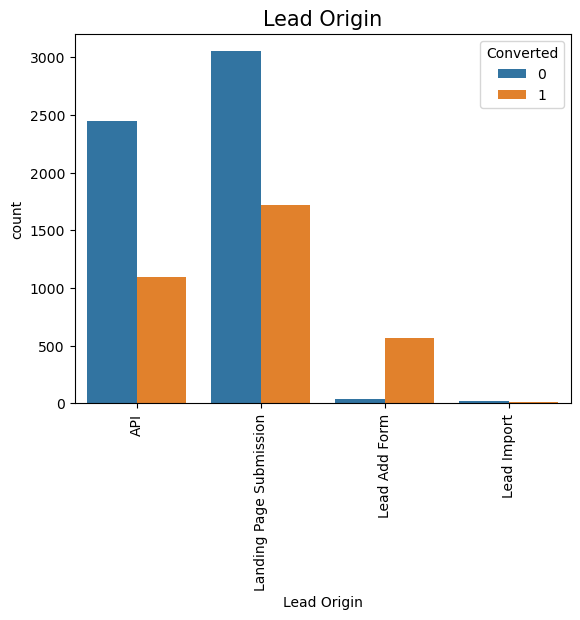

In [560]:
# Analysing 'Lead Origin'

sns.countplot(x='Lead Origin',data=lead_df,hue='Converted')
plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=15)
plt.show()

# Observations
- Convertion via 'Lead Add Form' is very high
- 'Lead Import' convertion is low
- Have to focus on 'API','Landing Page Submssion'

In [561]:
# Analysing 'Lead Origin'

lead_df['Lead Source'].value_counts(normalize=True)*100

Google               32.056294
Direct Traffic       27.912432
Olark Chat           19.557690
Organic Search       12.197029
Reference             4.936893
Welingak Website      1.440858
Referral Sites        1.306825
Facebook              0.346253
bing                  0.067017
Click2call            0.044678
Social Media          0.022339
Live Chat             0.022339
Pay per Click Ads     0.011169
blog                  0.011169
WeLearn               0.011169
welearnblog_Home      0.011169
youtubechannel        0.011169
testone               0.011169
Press_Release         0.011169
NC_EDM                0.011169
Name: Lead Source, dtype: float64

In [562]:
# Bucketing the sources into 'Others' which are having less than 1% of total value

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call',
'Facebook',
'Live Chat',
'NC_EDM',
'Pay per Click Ads',
'Press_Release',
'Social Media',
'WeLearn',
'bing',
'blog',
'testone',
'welearnblog_Home',
'youtubechannel'],'Others')

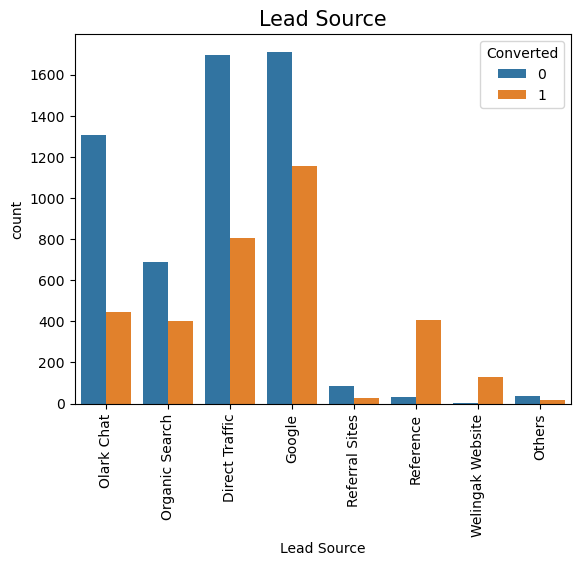

In [563]:
# Analysing 'Lead Origin'

sns.countplot(x='Lead Source',data=lead_df,hue='Converted')
plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=15)
plt.show()

# Observations
- Convertion ratio is high if the source is 'Reference' and 'Welingak Website'
- Have to focus on 'Referral sites' more and 'Google','Direct Traffic', 'Organic Search', 'Olark Chat'
- Can be looked further into 'Others' bucket as well


In [564]:
# Analysing 'Do Not Email'

lead_df['Do Not Email'].value_counts(normalize=True)*100

No     92.2149
Yes     7.7851
Name: Do Not Email, dtype: float64

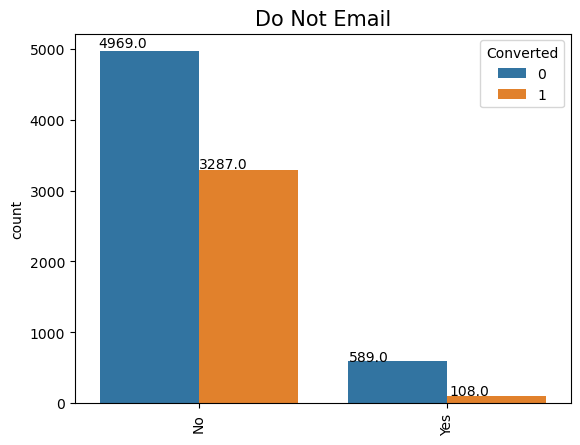

In [565]:
#sns.countplot(x='Do Not Email',data=lead_df,hue='Converted')

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=15)
plt.show()

# Observation
- People who opted for email truning more leads, around 66%  

In [566]:
# Analysing 'Last Activity' column

lead_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.864403
SMS Sent                        30.157489
Olark Chat Conversation         10.789679
Page Visited on Website          6.634648
Converted to Lead                4.780520
Email Bounced                    3.462527
Email Link Clicked               2.948732
Form Submitted on Website        1.273316
Unreachable                      0.982911
Unsubscribed                     0.670166
Had a Phone Conversation         0.268067
Approached upfront               0.055847
View in browser link Clicked     0.044678
Email Received                   0.022339
Email Marked Spam                0.022339
Visited Booth in Tradeshow       0.011169
Resubscribed to emails           0.011169
Name: Last Activity, dtype: float64

In [567]:
# Bucketing the categories into 'Others' whose value is less than 1 %

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable',
'Unsubscribed',
'Had a Phone Conversation',
'Approached upfront',
'View in browser link Clicked',
'Email Received',
'Email Marked Spam',
'Visited Booth in Tradeshow',
'Resubscribed to emails'],'Others')

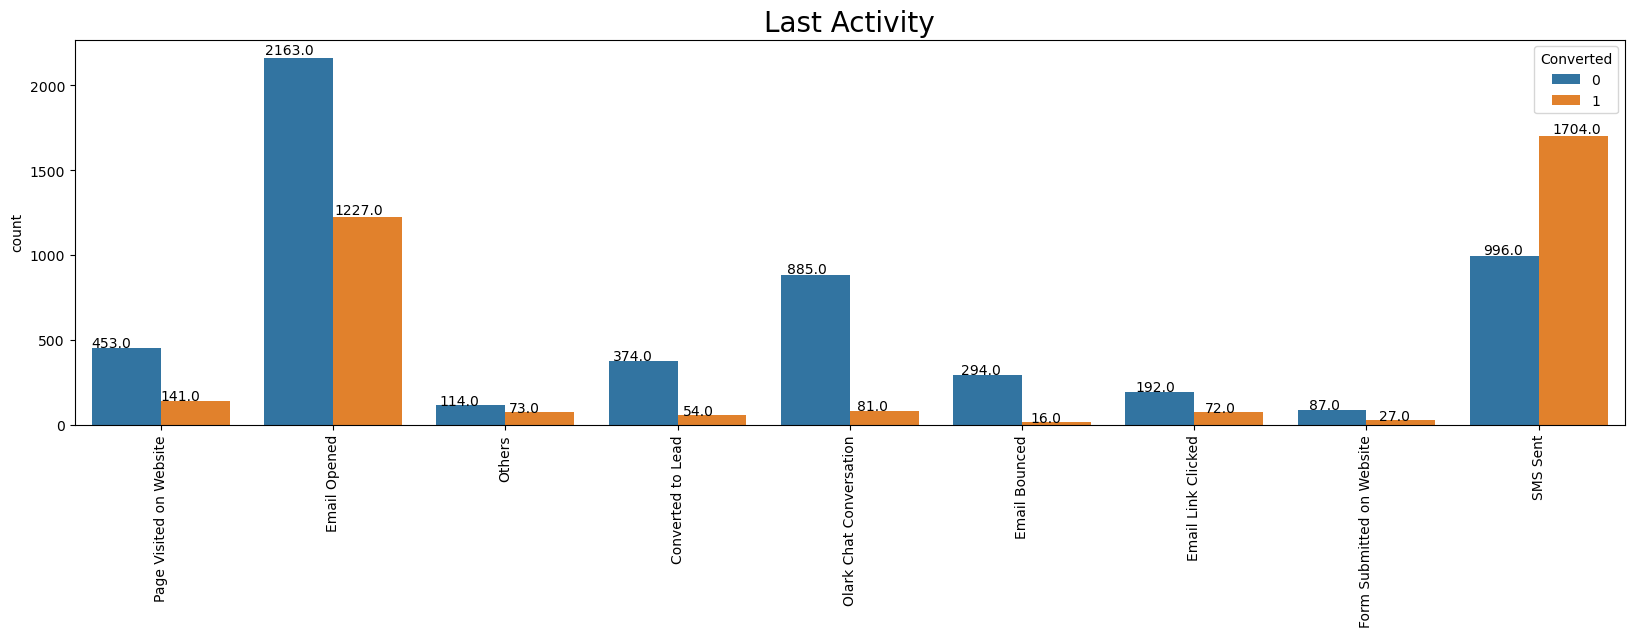

In [568]:
# Analysing 'Last Activity' column

plt.figure(figsize = (20,5))
ax=sns.countplot(x = 'Last Activity', hue = "Converted", data = lead_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)
plt.show()

# Observations
- 'Email Opened' is the highest volume
- 'SMS Sent' has highest convertion rate 

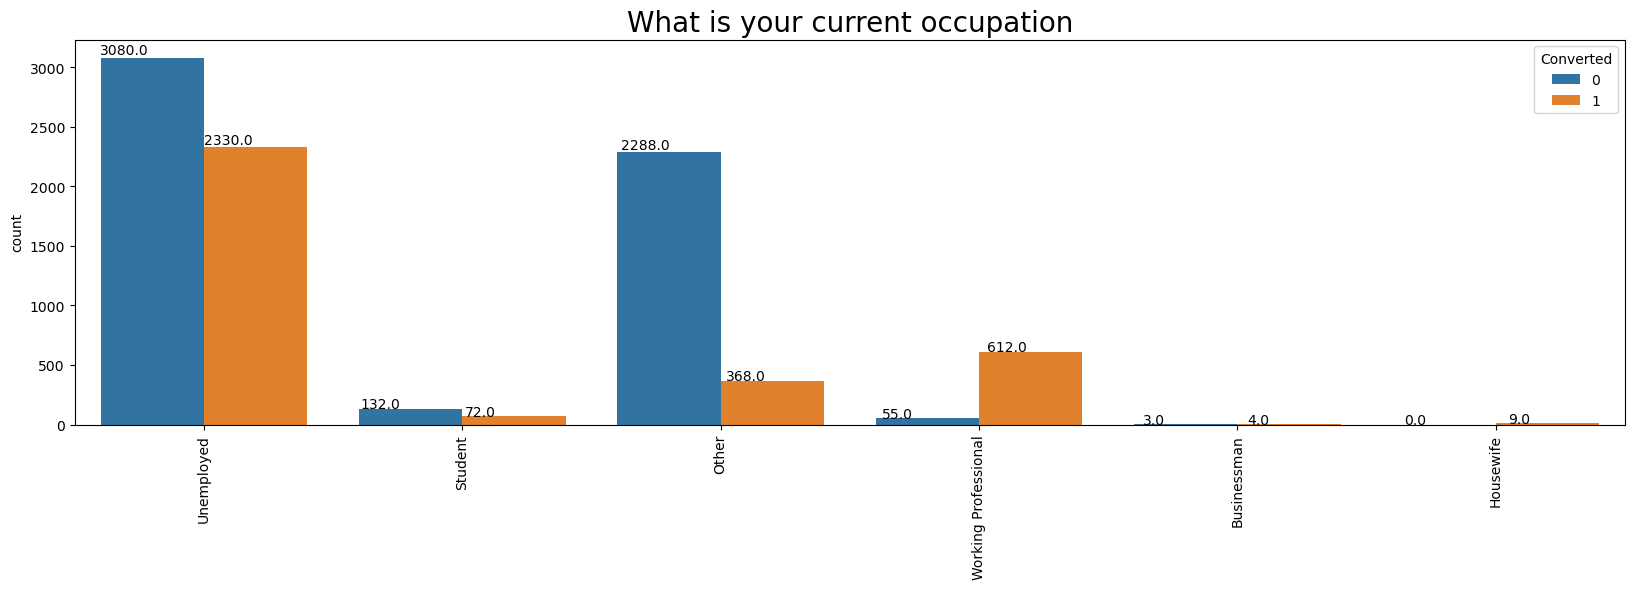

In [569]:
# Analysing 'What is your current occupation' column

plt.figure(figsize = (20,5))
ax=sns.countplot(x = 'What is your current occupation', hue = "Converted", data = lead_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('What is your current occupation',fontsize=20)
plt.show()

# Observations
- 'Unemployed' category is more in volume and more contributing group to Leads as well
- On the convertion ratio 'Working Professional' (91%) and 'Housewife' (~100%) are on highest side
- Students are turning 35% into leads, which can a focus area
- Businessman are also around 57% convertion ratio



# Bivariate Analysis

<Axes: >

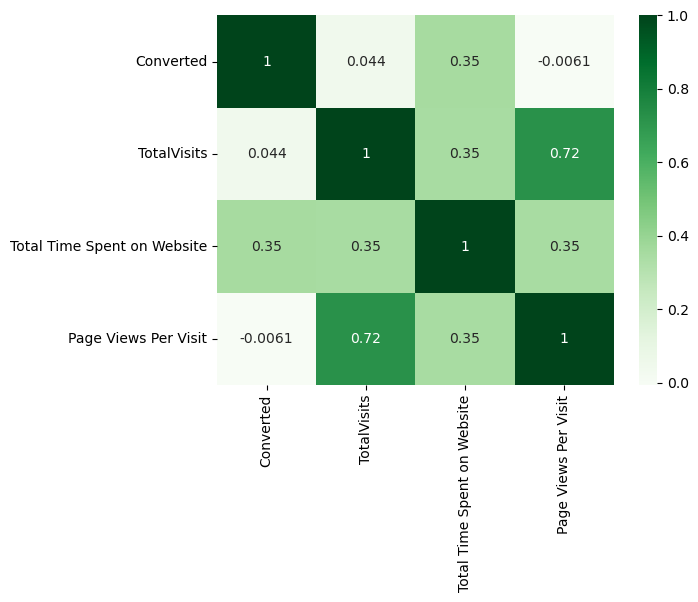

In [570]:
# Plotting Heatmap

sns.heatmap(lead_df.corr(),annot=True,cmap='Greens')

# Observations
- 'TotalVisits' and 'Page Views Per Visit' are highly correlated
- 'Total Tme SPent on Website', 'TotalVisits' are having ~ 35% correlation with 'Converted' column


# Step 4 : Data preparation

In [571]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8953 non-null   object 
 1   Lead Source                      8953 non-null   object 
 2   Do Not Email                     8953 non-null   object 
 3   Converted                        8953 non-null   int64  
 4   TotalVisits                      8953 non-null   float64
 5   Total Time Spent on Website      8953 non-null   int64  
 6   Page Views Per Visit             8953 non-null   float64
 7   Last Activity                    8953 non-null   object 
 8   What is your current occupation  8953 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 699.5+ KB


In [572]:
# Introducing 0/1 instead of 'No/Yes' in the column 'Do Not Email'

lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})

In [573]:
# Introducing dummies to categorical columns

col_lst_cat = list(lead_df.columns[lead_df.dtypes == 'object'])
col_lst_num = list(lead_df.columns[lead_df.dtypes != 'object'])
dummies = pd.get_dummies(lead_df[col_lst_cat], drop_first=True) 


In [574]:
# Adding dummies to the actual dataframe 

lead_df = pd.concat([lead_df,dummies],axis = 1)

In [575]:
# Dropping the origional columns as they have corresponding dummies introduced

lead_df.drop(columns=col_lst_cat,inplace=True)

In [576]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Step 5 : Train and Test dataset split

In [577]:
# Importing requried libraries

from sklearn.model_selection import train_test_split

In [578]:
# Backup the dataframe as before step5
lead_df_b5 = lead_df

# X without having our target variable 'Converted'
X = lead_df.drop(['Converted'],axis=1)

In [579]:
# y variable

y = lead_df['Converted']

In [580]:
# Spilitting into 70:30 ratio with 100% randomness

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6 : Feature scaling

In [581]:
# Importing required package

from sklearn.preprocessing import StandardScaler

In [582]:
scaler = StandardScaler()

In [583]:
col_lst_num = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [584]:
X_train[col_lst_num] = scaler.fit_transform(X_train[col_lst_num])

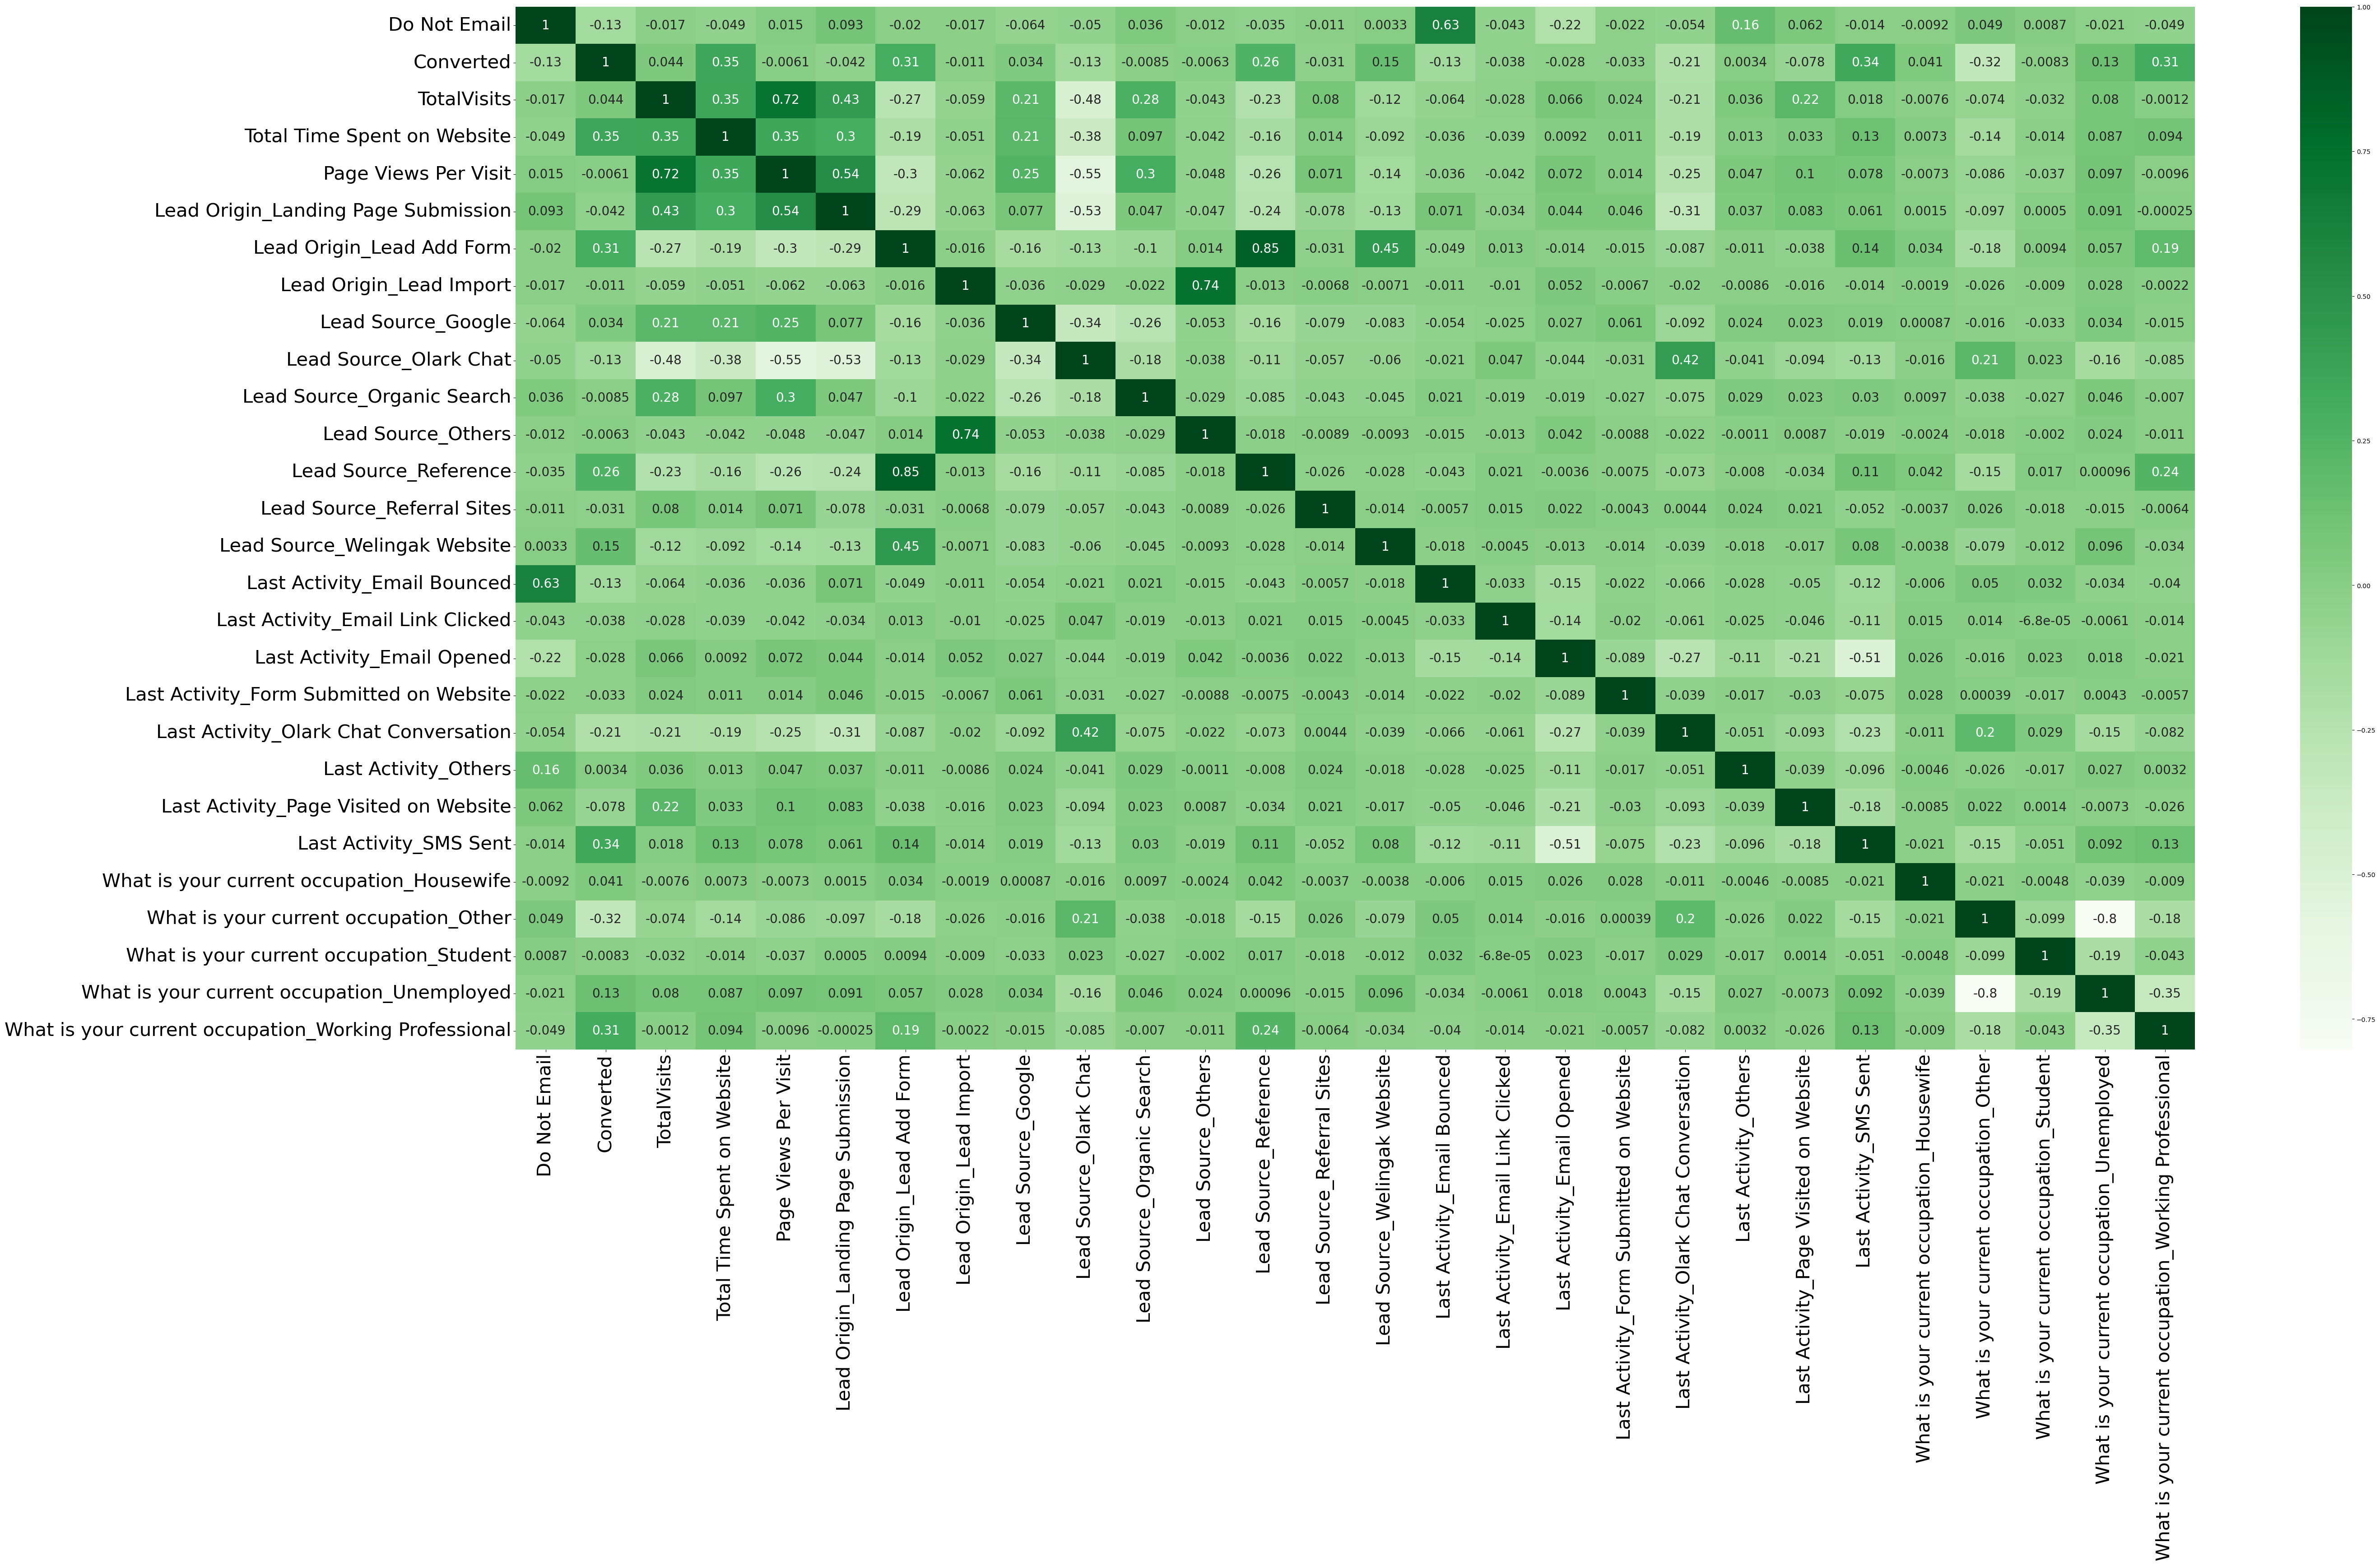

In [585]:
plt.figure(figsize = (60, 30))
sns.heatmap(lead_df.corr(), annot = True, cmap="Greens",annot_kws={"size": 20})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Observations
- Below columns have high co-relation(Multicolinearlity), we will verify and elimate the columns accordingly during feature selection  
    - 'Do Not Email' vs 'last activity - Email bounced/'
    - 'TotalVisits' vs 'Page views Per Visit'
    - 'Lead orgion' vs 'Lead Source'
    

# Step 7: Model Building

In [586]:
# Using stats model and RFE 
# Importing required libraries

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [587]:
#  Importing RFE libraries

from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select=15,step=1) 
rfe = rfe.fit(X_train, y_train)

In [588]:
# REF weightage scores
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current 

In [589]:
# Getting RFE selected columns

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [590]:
# X with RFE selected columns

X_train_rfe = X_train[rfe_col]

In [591]:
# Importing stats model library

import statsmodels.api as sm

# Creating a function to use Variance Inflation Factor(VIF) Method¶

In [592]:
# Import VIF library and a function

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_value(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Model - 1

In [593]:
# Adding constant and running model 1

X_train_sm = sm.add_constant(X_train_rfe)
lm_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.7
Date:                Sun, 17 Sep 2023   Deviance:                       5089.4
Time:                        11:34:31   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7070      0.102    -16.747      0.000      -1.907      -1.507
Do Not Email                                            -1.3447      0.180     -7.451      0.000      -1.698      -0.991
Total Time Spent on Website                              1.0941      0.041     26.969      0.000       1.015       1.174
Lead Origin_Lead Add Form                                3.5478      0.642      5.523      0.000       2.289       4.807
Lead Source_Olark Chat                                   1.3556      0.105     12.879      0.000       1.149       1.562
Lead Source_Others                                       0.7731      0.409      1.891      0.059      -0.028       1.574
Lead Source_Reference                                    0.4148      0.686      0.604      0.546      -0.930       1.760
Lead Source_Welingak Website                             2.6520      1.197      2.216      0.027       0.307       4.997
Last Activity_Email Opened                               0.6935      0.111      6.263      0.000       0.476       0.910
Last Activity_Olark Chat Conversation                   -0.8864      0.194     -4.563      0.000      -1.267      -0.506
Last Activity_Others                                     1.4173      0.244      5.806      0.000       0.939       1.896
Last Activity_SMS Sent                                   1.8630      0.113     16.492      0.000       1.642       2.084
What is your current occupation_Housewife               22.9639   1.79e+04      0.001      0.999   -3.52e+04    3.52e+04
What is your current occupation_Other                   -1.2454      0.088    -14.205      0.000      -1.417      -1.074
What is your current occupation_Student                 -0.0507      0.235     -0.216      0.829      -0.512       0.410
What is your current occupation_Working Professional     2.4371      0.196     12.423      0.000       2.053       2.822
========================================================================================================================
"""

# Observations 
- Dropping the column What is your current occupation_Housewife due to high p-value 0.999


In [594]:
X_train_sm_backup = X_train_sm
X_train_sm = X_train_sm.drop(["What is your current occupation_Housewife"], axis = 1)

# Model - 2

In [595]:
X_train_sm = sm.add_constant(X_train_sm)
lm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.8
Date:                Sun, 17 Sep 2023   Deviance:                       5097.6
Time:                        11:35:56   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4027
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6983      0.102    -16.706      0.000      -1.898      -1.499
Do Not Email                                            -1.3472      0.180     -7.467      0.000      -1.701      -0.994
Total Time Spent on Website                              1.0928      0.041     26.965      0.000       1.013       1.172
Lead Origin_Lead Add Form                                3.5455      0.642      5.519      0.000       2.286       4.804
Lead Source_Olark Chat                                   1.3513      0.105     12.847      0.000       1.145       1.557
Lead Source_Others                                       0.7686      0.409      1.881      0.060      -0.032       1.569
Lead Source_Reference                                    0.4257      0.686      0.620      0.535      -0.919       1.771
Lead Source_Welingak Website                             2.6489      1.197      2.214      0.027       0.304       4.994
Last Activity_Email Opened                               0.6905      0.110      6.250      0.000       0.474       0.907
Last Activity_Olark Chat Conversation                   -0.8913      0.194     -4.591      0.000      -1.272      -0.511
Last Activity_Others                                     1.4107      0.244      5.781      0.000       0.932       1.889
Last Activity_SMS Sent                                   1.8559      0.113     16.460      0.000       1.635       2.077
What is your current occupation_Other                   -1.2481      0.088    -14.242      0.000      -1.420      -1.076
What is your current occupation_Student                 -0.0552      0.235     -0.234      0.815      -0.516       0.406
What is your current occupation_Working Professional     2.4323      0.196     12.403      0.000       2.048       2.817
========================================================================================================================
"""

# Observation
- Dropping the column What is your current occupation_Student due to high p-value 0.815


In [596]:
X_train_sm = X_train_sm.drop(["What is your current occupation_Student"], axis = 1)

# Model - 3

In [597]:
X_train_sm = sm.add_constant(X_train_sm)
lm_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.8
Date:                Sun, 17 Sep 2023   Deviance:                       5097.6
Time:                        11:36:27   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4027
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7002      0.101    -16.773      0.000      -1.899      -1.502
Do Not Email                                            -1.3475      0.180     -7.469      0.000      -1.701      -0.994
Total Time Spent on Website                              1.0927      0.041     26.967      0.000       1.013       1.172
Lead Origin_Lead Add Form                                3.5454      0.642      5.519      0.000       2.286       4.805
Lead Source_Olark Chat                                   1.3507      0.105     12.847      0.000       1.145       1.557
Lead Source_Others                                       0.7678      0.409      1.878      0.060      -0.033       1.569
Lead Source_Reference                                    0.4242      0.686      0.618      0.537      -0.921       1.769
Lead Source_Welingak Website                             2.6503      1.197      2.215      0.027       0.305       4.996
Last Activity_Email Opened                               0.6905      0.110      6.249      0.000       0.474       0.907
Last Activity_Olark Chat Conversation                   -0.8926      0.194     -4.599      0.000      -1.273      -0.512
Last Activity_Others                                     1.4121      0.244      5.789      0.000       0.934       1.890
Last Activity_SMS Sent                                   1.8569      0.113     16.480      0.000       1.636       2.078
What is your current occupation_Other                   -1.2464      0.087    -14.273      0.000      -1.418      -1.075
What is your current occupation_Working Professional     2.4340      0.196     12.420      0.000       2.050       2.818
========================================================================================================================
"""

# Observation 
- Dropping the column 'Lead Source_Reference' due to high p-value

In [598]:
X_train_sm = X_train_sm.drop(["Lead Source_Reference"], axis = 1)

# Model - 4

In [601]:
X_train_sm = sm.add_constant(X_train_sm)
lm_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.0
Date:                Sun, 17 Sep 2023   Deviance:                       5098.0
Time:                        11:38:17   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6981      0.101    -16.771      0.000      -1.897      -1.500
Do Not Email                                            -1.3571      0.180     -7.529      0.000      -1.710      -1.004
Total Time Spent on Website                              1.0926      0.041     26.963      0.000       1.013       1.172
Lead Origin_Lead Add Form                                3.9198      0.242     16.175      0.000       3.445       4.395
Lead Source_Olark Chat                                   1.3502      0.105     12.841      0.000       1.144       1.556
Lead Source_Others                                       0.7586      0.410      1.848      0.065      -0.046       1.563
Lead Source_Welingak Website                             2.2770      1.039      2.191      0.028       0.240       4.314
Last Activity_Email Opened                               0.6892      0.110      6.241      0.000       0.473       0.906
Last Activity_Olark Chat Conversation                   -0.8942      0.194     -4.609      0.000      -1.274      -0.514
Last Activity_Others                                     1.4068      0.244      5.762      0.000       0.928       1.885
Last Activity_SMS Sent                                   1.8548      0.113     16.475      0.000       1.634       2.075
What is your current occupation_Other                   -1.2463      0.087    -14.272      0.000      -1.417      -1.075
What is your current occupation_Working Professional     2.4354      0.196     12.431      0.000       2.051       2.819
========================================================================================================================
"""

# Observation 
- Dropping 'Lead Source_Others' column due to high p-Value


In [603]:
X_train_sm = X_train_sm.drop(["Lead Source_Others"], axis = 1)

# Model - 5

In [612]:
X_train_sm = sm.add_constant(X_train_sm)
lm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.6
Date:                Sun, 17 Sep 2023   Deviance:                       5101.2
Time:                        12:01:14   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6912      0.101    -16.731      0.000      -1.889      -1.493
Do Not Email                                            -1.3590      0.180     -7.542      0.000      -1.712      -1.006
Total Time Spent on Website                              1.0864      0.040     26.944      0.000       1.007       1.165
Lead Origin_Lead Add Form                                3.9123      0.242     16.157      0.000       3.438       4.387
Lead Source_Olark Chat                                   1.3364      0.105     12.758      0.000       1.131       1.542
Lead Source_Welingak Website                             2.2703      1.039      2.185      0.029       0.233       4.307
Last Activity_Email Opened                               0.6932      0.110      6.283      0.000       0.477       0.909
Last Activity_Olark Chat Conversation                   -0.8928      0.194     -4.604      0.000      -1.273      -0.513
Last Activity_Others                                     1.4032      0.244      5.751      0.000       0.925       1.881
Last Activity_SMS Sent                                   1.8562      0.113     16.496      0.000       1.636       2.077
What is your current occupation_Other                   -1.2474      0.087    -14.293      0.000      -1.418      -1.076
What is your current occupation_Working Professional     2.4395      0.196     12.442      0.000       2.055       2.824
========================================================================================================================
"""

# Observation
- Not seeing any insignificant column based on p-Value
- We will verify using VIF as well

In [614]:
# Calling VIF function
X_train_final = X_train_sm.drop('const',axis=1)
vif_value(X_train_final)

,Features,VIF
3,Lead Source_Olark Chat,1.80
2,Lead Origin_Lead Add Form,1.59
6,Last Activity_Olark Chat Conversation,1.50
9,What is your current occupation_Other,1.49
5,Last Activity_Email Opened,1.33
4,Lead Source_Welingak Website,1.32
8,Last Activity_SMS Sent,1.32
1,Total Time Spent on Website,1.30
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.10


# Observation
- VIF also confirms the features looks good no need to drop any of them

# Step - 8 : Model Prediction

In [618]:
# Function to get predicted values on train set

def get_prediction(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [623]:
y_train_pred_final  = get_prediction(X_train_sm,lm_5)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,1,0.897786,9196,1
1,0,0.530931,4696,1
2,0,0.144296,3274,0
3,0,0.059973,2164,0
4,1,0.591272,1667,1


# Creating and using confusion metrics

In [620]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def get_confusion_matrix(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [628]:
# Function to get Sensitivity, Specificity and other  metrics
def get_other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))
    

In [624]:
# Getting confusion matrics and accuracy value

confusion = get_confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3460  422]
 [ 738 1647]]
Training Accuracy:  0.8149034625817776


In [629]:
# Getting Sensitivity, Specificity and other  metrics

get_other_metrics(confusion)

Sensitivity:  0.690566037735849
Specificity:  0.8912931478619268
False postive rate - predicting the lead conversion when the lead does not convert:  0.10870685213807316
Positive predictive value:  0.7960367327211213
Negative predictive value:  0.8242020009528347


In [732]:
# Calculating Precision value

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7234453456933179

In [733]:
# Calculating Recall value

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7853249475890985

# Observation
- In final model the p-value and VIF are within good limit
- Training accuracy is 81 %
- Sensitivity is 69 %
- Specificity is 89 %


# Step - 10 : Plotting ROC curve

In [637]:
# Function to plot ROC
def get_roc_plot(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [638]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

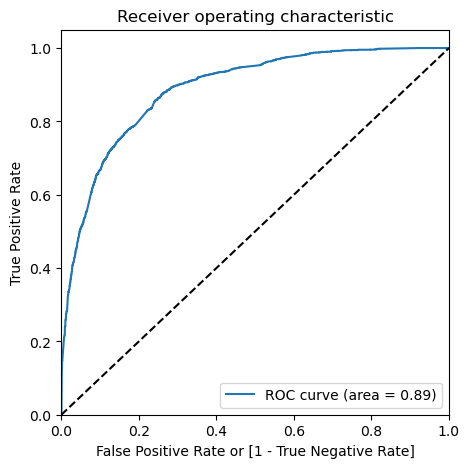

In [639]:
# Calling ROC curve plot function
get_roc_plot(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Observation

- ROC curve value 0.89 which is of a good model

# Step - 10 : Finding Cutoff points

In [643]:
# To find the optimal cutoff point to see balanced Sensitivity and Specificity, lets add values to get those values for few probablities

p_num = [float(x)/10 for x in range(11)]
for num in p_num:
    y_train_pred_final[num]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > num else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,1,0.897786,9196,1,1,1,1,1,1,1,1,1,1,0,0
1,0,0.530931,4696,1,1,1,1,1,1,1,0,0,0,0,0
2,0,0.144296,3274,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.059973,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.591272,1667,1,1,1,1,1,1,1,0,0,0,0,0


In [648]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs

cutoff = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])
for num in p_num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[num] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff.loc[num] =[ num ,accuracy,sensitivity,specificity]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.380565     1.000000     0.000000
0.1          0.1  0.609382     0.979874     0.381762
0.2          0.2  0.754907     0.912788     0.657908
0.3          0.3  0.791288     0.874214     0.740340
0.4          0.4  0.810755     0.758071     0.843122
0.5          0.5  0.814903     0.690566     0.891293
0.6          0.6  0.805808     0.621803     0.918856
0.7          0.7  0.782192     0.509434     0.949768
0.8          0.8  0.758098     0.414675     0.969088
0.9          0.9  0.711664     0.260377     0.988923
1.0          1.0  0.619435     0.000000     1.000000


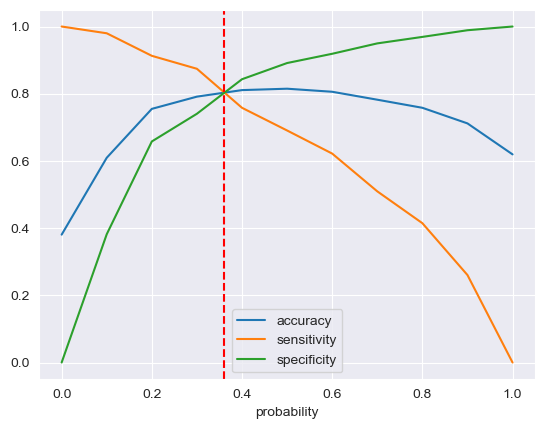

In [699]:
# Plotting graph 
sns.set_style('darkgrid')
cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.axvline(x=0.36, color='r', linestyle='--')
plt.show()



# Observation
- 0.36 is the optiomal cutoff point

In [655]:
# Using 0.36 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,final_predicted
0,1,0.897786,9196,1,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.530931,4696,1,1,1,1,1,1,1,0,0,0,0,0,1
2,0,0.144296,3274,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.059973,2164,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.591272,1667,1,1,1,1,1,1,1,0,0,0,0,0,1


In [656]:
# Let us drop those additonal columns( probability range)

y_train_pred_final.drop(columns=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],axis = 1, inplace = True) 

In [658]:
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,final_predicted
0,1,0.897786,9196,1,1
1,0,0.530931,4696,1,1
2,0,0.144296,3274,0,0
3,0,0.059973,2164,0,0
4,1,0.591272,1667,1,1


In [659]:
# Getting confusion matrics and accuracy value

confusion = get_confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3166  716]
 [ 512 1873]]
Training Accuracy:  0.8040529759055369


In [660]:
# Getting Sensitivity, Specificity and other  metrics

get_other_metrics(confusion)

Sensitivity:  0.7853249475890985
Specificity:  0.8155589902112313
False postive rate - predicting the lead conversion when the lead does not convert:  0.18444100978876868
Positive predictive value:  0.7234453456933179
Negative predictive value:  0.8607939097335509


In [661]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3882
           1       0.72      0.79      0.75      2385

    accuracy                           0.80      6267
   macro avg       0.79      0.80      0.80      6267
weighted avg       0.81      0.80      0.81      6267



# Precision and Recall tradeoff

In [662]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

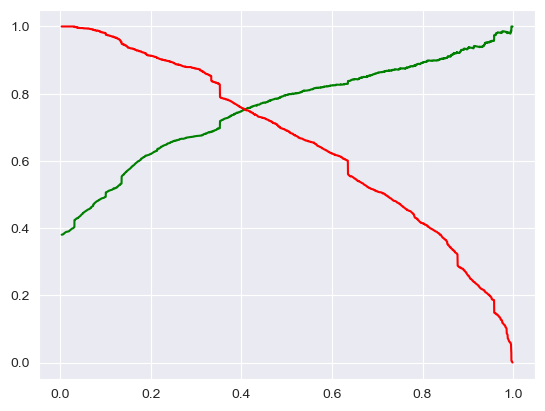

In [663]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Observation
- From the precision and recall curve we get 0.42 as threshold

In [700]:
# Using 0.42 threshold for predictions

y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,final_predicted,final_predicted_pr
0,1,0.897786,9196,1,1,1
1,0,0.530931,4696,1,1,1
2,0,0.144296,3274,0,0,0
3,0,0.059973,2164,0,0,0
4,1,0.591272,1667,1,1,1


In [701]:
# Confusion matrix and overall accuracy
confusion = get_confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3318  564]
 [ 607 1778]]
Training Accuracy:  0.8131482367959151


In [702]:
# Other metrics
get_other_metrics(confusion)

Sensitivity:  0.7454926624737945
Specificity:  0.8547140649149922
False postive rate - predicting the lead conversion when the lead does not convert:  0.14528593508500773
Positive predictive value:  0.7591801878736123
Negative predictive value:  0.8453503184713376


# Making prediction on the Test set

In [667]:
# Feature transform on Test set

X_test[col_lst_num] = scaler.fit_transform(X_test[col_lst_num])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7681,0,0.575687,-0.311318,0.092860,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
984,0,-0.090676,-0.550262,0.356568,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8135,1,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6915,0,0.242505,-0.628665,-0.170849,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,0,-0.090676,-0.421456,0.356568,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [683]:
X_train_sm1=X_train_sm.drop('const',axis=True)
col_list = X_train_sm1.columns
#col_list.remove('const')
col_list

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [687]:
X_test_sm = X_test[col_list]
X_test_sm = sm.add_constant(X_test_sm)

In [689]:
# Making predictions
y_test_pred = lm_5.predict(X_test_sm)
y_test_pred.head()

7681    0.456797
984     0.393447
8135    0.173828
6915    0.156965
2712    0.189101
dtype: float64

In [691]:
# To convert y_pred to a dataframe which is an array

y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
7681,0.456797
984,0.393447
8135,0.173828
6915,0.156965
2712,0.189101


In [692]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [694]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [695]:
# To remove index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [696]:
# To append y_test_df and y_test_pred_df

y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,0,7681,0.456797
1,0,984,0.393447
2,0,8135,0.173828
3,0,6915,0.156965
4,1,2712,0.189101


In [697]:
# To Rename the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,7681,0.456797
1,0,984,0.393447
2,0,8135,0.173828
3,0,6915,0.156965
4,1,2712,0.189101


In [703]:
# To put the threshold of 0.42 as derived

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,7681,0.456797,1
1,0,984,0.393447,0
2,0,8135,0.173828,0
3,0,6915,0.156965,0
4,1,2712,0.189101,0


In [704]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.888564829036603


In [705]:
# Confusion matrix and overall accuracy
confusion_test = get_confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1411  265]
 [ 249  761]]
Training Accuracy:  0.8086373790022338


In [706]:
# Getting Sensitivity, Specificity and other  metrics

get_other_metrics(confusion_test)

Sensitivity:  0.7534653465346535
Specificity:  0.8418854415274463
False postive rate - predicting the lead conversion when the lead does not convert:  0.1581145584725537
Positive predictive value:  0.7417153996101364
Negative predictive value:  0.85


In [734]:
# Calculating Precision value

precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7417153996101364

In [735]:
# Calculating Recall value

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7534653465346535

In [707]:
# Classification Report

print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1676
           1       0.74      0.75      0.75      1010

    accuracy                           0.81      2686
   macro avg       0.80      0.80      0.80      2686
weighted avg       0.81      0.81      0.81      2686



# Model Building using PCA(Principal Component Analysis)

In [713]:
# Improting PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [714]:
# PCA on train data
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [715]:
pca.explained_variance_ratio_

array([4.19772690e-01, 1.46807309e-01, 8.06765916e-02, 6.49956425e-02,
       5.66444547e-02, 4.29417209e-02, 3.58200860e-02, 3.20378719e-02,
       2.30320808e-02, 1.82303740e-02, 1.44706478e-02, 1.40682511e-02,
       1.21006317e-02, 7.32259816e-03, 6.20567812e-03, 5.12003491e-03,
       4.38527403e-03, 3.94809616e-03, 3.58036260e-03, 2.61073181e-03,
       2.21031747e-03, 1.49960300e-03, 8.50481351e-04, 2.75817258e-04,
       1.96951476e-04, 1.72051055e-04, 2.36513146e-05])

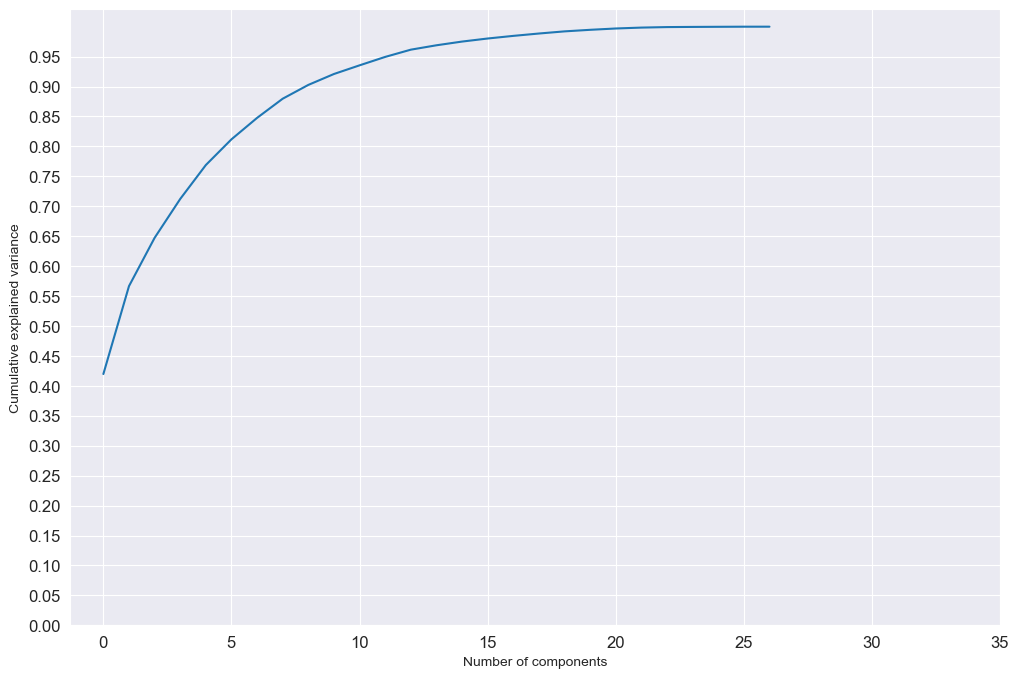

In [716]:
# To make the screeplot

fig = plt.figure(figsize = (12,8))
# To set style to grids for better visualisation
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(np.arange(0, 40, step=5), size = 12)
plt.yticks(np.arange(0.0, 1.0, step=0.05), size = 12)
plt.show()
# To change the style back
sns.set_style('white')

# Observation

- Let try with 8 features as PCA says 8 are enough to describe 90% 

In [718]:
# To use incremental PCA for efficiency

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=8)

In [719]:
# To get principal components of the train data

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(6267, 8)

In [720]:
# To create correlation matrix for the principal components

corrmat = np.corrcoef(df_train_pca.transpose())

<Axes: >

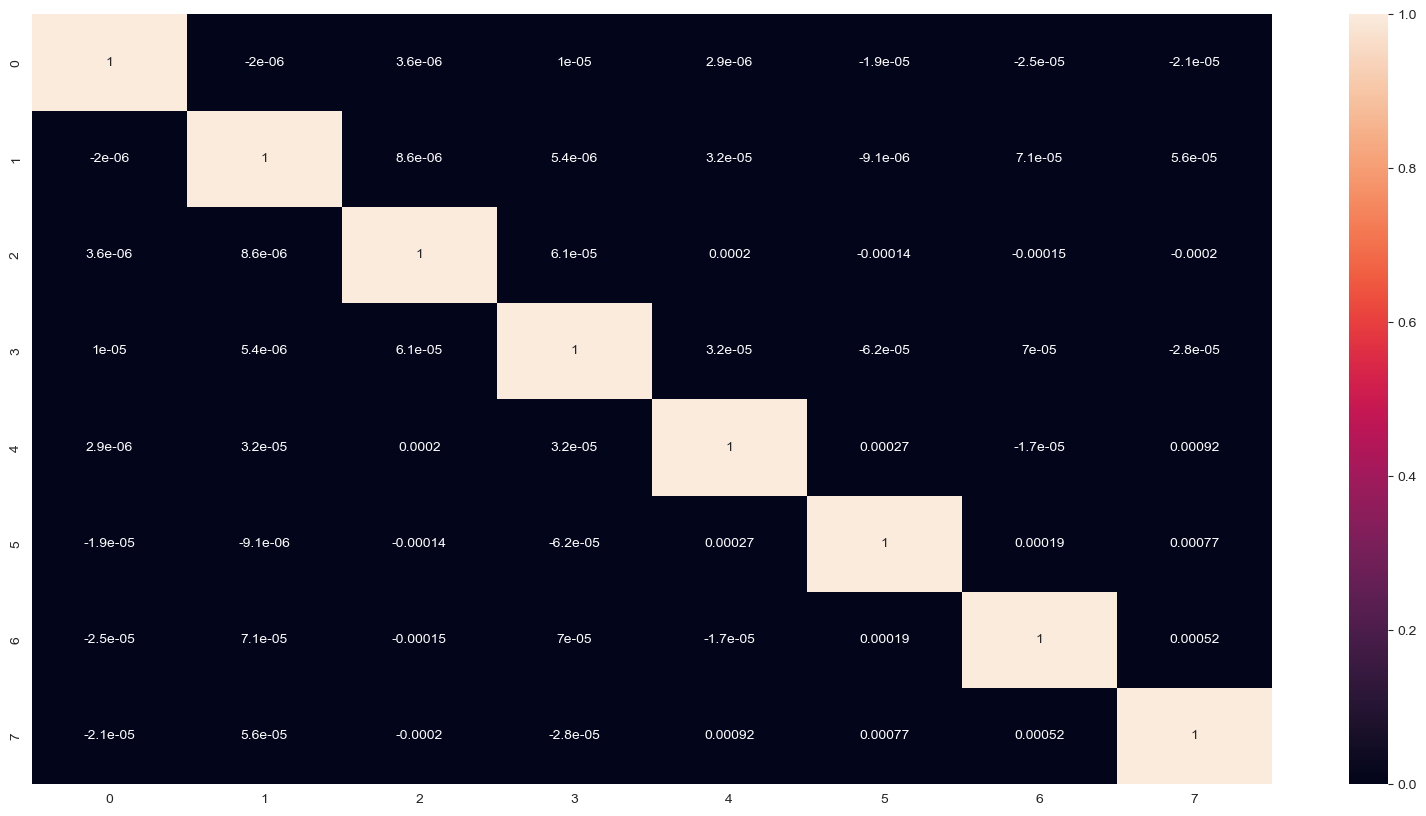

In [721]:
# To plot the correlation matrix

plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [722]:
# To apply selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2686, 8)

In [723]:
# Applying Logistic Regression on Principal Components

# To train the model

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

# Making Predictions

In [725]:
# On Train set

pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
print("Area under curve: ", metrics.roc_auc_score(y_train, pred_probs_train))

Area under curve:  0.8670080260774613


In [726]:
# On Test set

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
print("Area under curve: ", metrics.roc_auc_score(y_test, pred_probs_test))

Area under curve:  0.8654259906897609


# Observations
- Comparing our Stats model & RFE approach vs PCA approach, Stats model & RFE approach gave better result
- Area under curve using Stats model & RFE approach is .89
- Area under curve using PCA approach is .86

# Determining Feature Importance

In [727]:
# To display features with corrsponding coefficients in final model

pd.options.display.float_format = '{:.2f}'.format
new_params = lm_5.params[1:]
new_params

Do Not Email                                           -1.36
Total Time Spent on Website                             1.09
Lead Origin_Lead Add Form                               3.91
Lead Source_Olark Chat                                  1.34
Lead Source_Welingak Website                            2.27
Last Activity_Email Opened                              0.69
Last Activity_Olark Chat Conversation                  -0.89
Last Activity_Others                                    1.40
Last Activity_SMS Sent                                  1.86
What is your current occupation_Other                  -1.25
What is your current occupation_Working Professional    2.44
dtype: float64

In [728]:
# Relative feature importance

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -34.74
Total Time Spent on Website                             27.77
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  34.16
Lead Source_Welingak Website                            58.03
Last Activity_Email Opened                              17.72
Last Activity_Olark Chat Conversation                  -22.82
Last Activity_Others                                    35.87
Last Activity_SMS Sent                                  47.44
What is your current occupation_Other                  -31.88
What is your current occupation_Working Professional    62.35
dtype: float64

In [729]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             0
Total Time Spent on Website                              9
Lead Origin_Lead Add Form                                6
Lead Source_Olark Chat                                   5
Lead Source_Welingak Website                             1
Last Activity_Email Opened                               3
Last Activity_Olark Chat Conversation                    7
Last Activity_Others                                     8
Last Activity_SMS Sent                                   4
What is your current occupation_Other                   10
What is your current occupation_Working Professional     2
dtype: int64

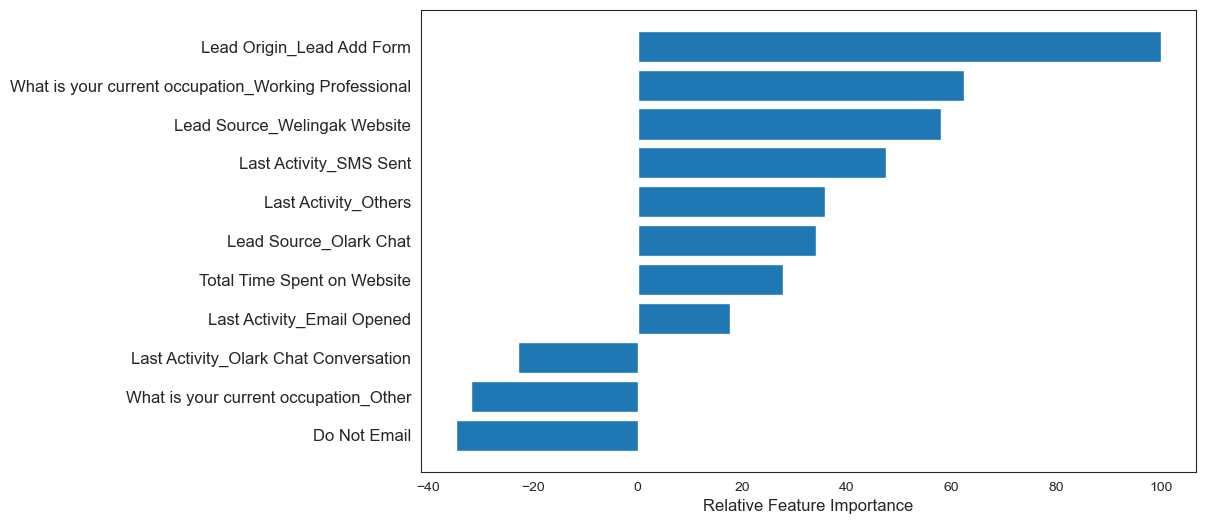

In [730]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col_list].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

# Final model equation

Converted =  0.357
             - 34.74 * Do Not Email
             + 27.77 * Total Time Spent on Website
             + 100 * Lead Origin_Lead Add Form
             + 34.16 * Lead Source_Olark Chat
             + 58.03 * Lead Source_Welingak Website
             + 17.72 * Last Activity_Email Opened
             - 22.82 * Last Activity_Olark Chat Conversation
             + 35.87 * Last Activity_Others
             + 47.44 * Last Activity_SMS Sent
             - 31.88 * What is your current occupation_Other
             + 62.35 * What is your current occupation_Working Professional

# Final observation


# Train set metrics

- Accuracy : 0.8149034625817776
- Sensitivity:  0.690566037735849
- Specificity:  0.8912931478619268
- False postive rate - predicting the lead conversion when the lead does not convert:  0.10870685213807316
- Positive predictive value:  0.7960367327211213
- Negative predictive value:  0.8242020009528347
- Precision : 0.7234453456933179
- Recall : 0.7853249475890985 

# Test set metrics

- Accuracy:  0.8086373790022338
- Sensitivity:  0.7534653465346535
- Specificity:  0.8418854415274463
- False postive rate - predicting the lead conversion when the lead does not convert:  0.1581145584725537
- Positive predictive value:  0.7417153996101364
- Negative predictive value:  0.85
- Precision : 0.7417153996101364
- Recall : 0.7534653465346535



# Conclusion

## X-Education has to focus on the below important features to ncrease the leads conversion rate

- Lead Origin_Lead Add Form                            
- What is your current occupation_Working Professional 
- Lead Source_Welingak Website                         
- Last Activity_SMS Sent                               
- Last Activity_Others                                 
- Lead Source_Olark Chat                               
- Total Time Spent on Website                          
- Last Activity_Email Opened                           
